In [2]:
import cv2
import numpy as np

In [3]:
from matplotlib import pyplot as plt

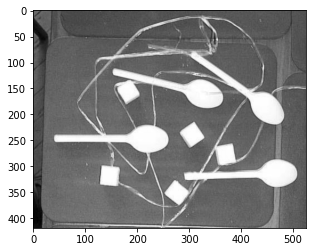

In [4]:
img = cv2.imread('spoons.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

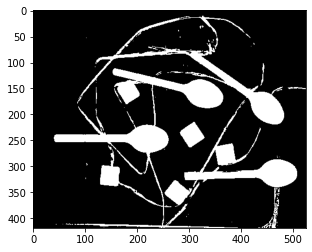

In [5]:
binarised = cv2.threshold(img, 150.0, 255.0, cv2.THRESH_BINARY)[1]
plt.imshow(binarised, cmap='gray')

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

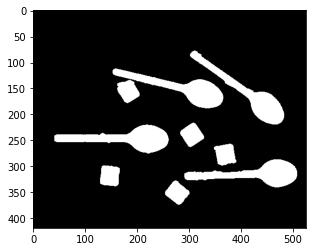

In [20]:
denoised = cv2.erode(binarised, kernel, iterations=2)
denoised = cv2.dilate(denoised, kernel, iterations=2)

plt.imshow(denoised, cmap='gray')

In [14]:
contours, _ = cv2.findContours(denoised, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
spoons_and_sugares = len(contours)
print('spoons and sugares', spoons_and_sugares)

spoons and sugares 9


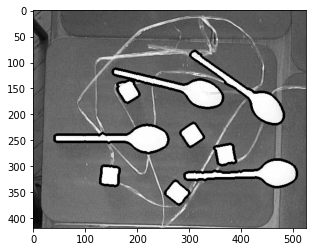

In [13]:
contours_drawn = cv2.drawContours(img, contours, -1, (0,255,0), 3)

plt.imshow(contours_drawn, cmap='gray')


In [28]:
sugares_deleted = cv2.erode(binarised, kernel, iterations=9)
contours, _ = cv2.findContours(sugares_deleted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
spoons = len(contours)
print('spoons: ', spoons)
print('sugares: ', spoons_and_sugares - spoons)

spoons:  4
sugares:  5
